# 05 FEM Assembly

Finally we got to the core of this course: the assembly process of the (most common) FEM matrices.

_Disclaimer: this introduction is largely inspired to the manual "A gentle introduction to Finite Elements" by Francisco Javier Sayas that I've uploaded in the Moodle space. Another useful reference is "Iterative Methods for Sparse Linear Systems" by Youssef Saad that I've too uploaded on Moodle._


Let's study an extra spicy Poisson problem for keeping things extra general and see as many concepts as we can:
$$
\begin{cases}
\displaystyle - \nabla \cdot (\sigma \nabla u) + cu &= f, \quad \text{in $\Omega$}, \\
\displaystyle u &= g_0, \quad \text{on $\Gamma_D$}, \\
\displaystyle (\sigma \nabla u) \cdot \mathbf{n} &= g_1, \quad \text{on $\Gamma_N$},
\end{cases}
$$
is also called *reaction-diffusion* equation. The diffusion term is given by $- \nabla \cdot (\sigma \nabla u)$ and the reaction term is $c u$.
There are new many things here, so let’s go step by step:


- The unknown is a (scalar valued) function u defined on the domain $\Omega$.

- $\sigma$ is a matrix valued function defined on $\Omega$ sometimes known as conductivity tensor. If $\sigma$ was of the form $s \cdot \mathbf{I}_d$ then $- \nabla \cdot (\sigma \nabla u) = - s \Delta u$, the usual Laplacian.

- Tip: think of $\sigma \nabla u$ as a vector variable $\mathbf{q}$ called _flux_.

- $c$ is a non-negative constant value. In principle we will consider two values $c = 1$ and $c = 0$. 

- $f$ is a given function on $\Omega$. It corresponds to source terms in the equation. It can be considered as a surface density of forces.

- There are two functions $g_0$ and $g_1$ given on the two different parts of the boundary. They will play very different roles in our formulation. As a general rule, we will demand that $g_0$ is a continuous function, whereas $g_1$ will be allowed to be discontinuous.

- $\mathbf{n}$ denotes the outward vector normal to the boundary.


We are not going to worry about regularity issues. If you see a derivative, admit that it exists and go on.

### Divergence Theorem

The _Divergence Theorem_ states
$$
\int_{\Omega} \nabla \cdot (\sigma \nabla u) v
+
\int_{\Omega} (\sigma \nabla u) \nabla v
=
\int_{\Gamma} (\sigma \nabla u) \cdot \mathbf{n} \, v.
$$
By plugging $\nabla \cdot (\sigma \nabla u) = cu -f$ into this we get
$$
\int_{\Omega} (cu -f) v
+
\int_{\Omega} (\sigma \nabla u) \nabla v
=
\int_{\Gamma_N} (\sigma \nabla u) \cdot \mathbf{n} \, v
+
\int_{\Gamma_D} (\sigma \nabla u) \cdot \mathbf{n} \, v
$$
that can be rearranged to have anything depending on $u$ on the lhs and the rest on the rhs:
$$
\int_{\Omega} (\sigma \nabla u) \nabla v
+
c\int_{\Omega} u v
=
\int_{\Omega} f v
+
\int_{\Gamma_N} g_1 v
+
\int_{\Gamma_D} (\sigma \nabla u) \cdot \mathbf{n} \, v.
$$
In fact we don’t know the value of $(\sigma \nabla u) \cdot \mathbf{n}$ on the Dirichlet part of the boundary $\Gamma_D$. So what we will do is impose that $v$ cancels in that part of the boundary (lol), that is,
$$
v = 0 \quad \text{on $\Gamma_D$},
$$
therefore
$$
\int_{\Omega} (\sigma \nabla u) \nabla v
+
c\int_{\Omega} u v
=
\int_{\Omega} f v
+
\int_{\Gamma_N} g_1 v.
$$

Notice now three things:

- We have not imposed the Dirichlet boundary condition yet. Nevertheless, we have imposed a similar one to the function $v$, but in a homogeneous way.

- As written now, data ($f$ and $g_1$) are in the right-hand side and coefficients of the equation are in the left-hand side.

- The expression on the left-hand side is linear in both $u$ and $v$. It is a bilinear form of the variables $u$ and $v$. The expression on the right-hand side is linear in $v$.

Without specifying spaces where $u$ and $v$ are, the weak formulation can be written as follows:

_"Find $u$ such that_
$$
\begin{cases}
\displaystyle
u &= g_0, \quad \text{on $\Gamma_D$}, \\
%
\displaystyle
\int_{\Omega} (\sigma \nabla u) \nabla v
+
c\int_{\Omega} u v
&=
\displaystyle
\int_{\Omega} f v
+
\int_{\Gamma_N} g_1 v% \quad \text{$\forall v$ s.t. $v = 0$ on $\Gamma_D$}.
\end{cases}
$$
_for all $v$ such that $v = 0$ on $\Gamma_D$"_.

Note how the two boundary conditions appear in very different places of this formulation:
- The Dirichlet condition (given displacements) is imposed apart from the formulation and involves imposing it homogeneously to the testing function $v$. It is called an _essential boundary condition_.

- The Neumann condition (given normal stresses) appears inside the formulation. It is called a _natural boundary condition_.


***Test functions?!***

At this point, you might (you should) be wondering what $v$ is in the formulation.
In the jargon of weak formulations, $v$ is called a _test function_.
It _tests_ the equation that is satisfied by $u$.
The main idea is that instead of looking at the equation as something satisfied point-by-point in the domain $\Omega$, you have an averaged version of the equation.
Then $v$ plays the role of a weight function, something you use to "average" the equation.

***Sobolev spaces?!***

It's time to be a little more specific on where we are looking for $u$ and where $v$ belongs. The first space we need is the space of square-integrable functions
$$
L^2(\Omega) 
=
\biggl\{
f : \Omega \rightarrow \mathbb{R} \,:\, \displaystyle \int_{\Omega} f^2 < +\infty
\biggr\}.
$$
The second space is one of the wide family of Sobolev spaces:
$$
H^1(\Omega)
=
\biggl\{
f \in L^2(\Omega) 
\,:\,
\text{
$\exists w_i \in L^2(\Omega)$ 
such that 
$\int_{\Omega} f \partial_{x_i}v = - \int_{\Omega} w_i v$, $i = 1,\ldots,d$, $\forall v \in C_c^{\infty}(\Omega)$
}
\biggr\}.
$$

Now, we are ok with the idea of writing our problem as:

_"Find $u \in H^1(\Omega)$ such that_
$$
\begin{cases}
\displaystyle
u &= g_0, \quad \text{on $\Gamma_D$}, \\
%
\displaystyle
\int_{\Omega} (\sigma \nabla u) \nabla v
+
c\int_{\Omega} u v
&=
\displaystyle
\int_{\Omega} f v
+
\int_{\Gamma_N} g_1 v% \quad \text{$\forall v$ s.t. $v = 0$ on $\Gamma_D$}.
\end{cases}
$$
_for all $v \in H^1(\Omega)$ such that $v = 0$ on $\Gamma_D$"_.

***Discretizations?!***

Recall that meshing is the process to create finite elements and to connect those elements to formulate a set of functions. 
Finite elements are created by separating the known geometry with imaginary lines, and the elements are then connected with each other by specifying nodal connectivity at the element boundaries.

Elements must cover all the domain $\Omega$ but no more and must fulfill the following rule: 

_"If two elements have some intersection, it is either a common vertex or a common FULL edge (or edge and face in 3D). In particular, two different elements do not overlap"._

For our problem, we throw in another rule, related to the partition of $\Gamma$ into $\Gamma_D$ and $\Gamma_N$:

_"the mesh must respect the partition of the boundary into Dirichlet and Neumann boundaries"._

Let's now consider once again the space
$$
V_h = 
\bigl\{
u \in C(\Omega) \,:\, u|_K \in \mathbb{P}_1 \text{ on every element $K$ of the mesh}%\forall K
\bigr\}
$$
that is the space of ***continuous*** piecewise linear functions with knots at our mesh's vertices. Here $h$ denotes the maximum distance between any two vertices of any element $K$ of our mesh.

A basis for this space is the set
$$
\bigl\{
\varphi_i \in V_h \,:\, \varphi_i(\mathbf{p}_j) = \delta_{ij}, \quad i,j = 1,2,\ldots,N_v
\bigr\}
$$
where $N_v$ is the number of vertices in our mesh.
Functions $u_h$ from $V_h$ can therefore be written as
$$
u_h(x) = \sum_{i = 1}^{N_v} u_i \varphi_i(x)
$$
for a collection of coefficients $u_1,u_2,\ldots,u_{N_v}$. Now good news:

***Theorem***. _Let $u_h$ be a function defined on a mesh of $\Omega$ such that restricted to each element it is a polynomial (or smooth) function. Then  $u_h \in H_1(\Omega)$ if and only if $u_h$ is continuous._

and therefore we can refine our search by considering the problem


_"Find $u_h \in V_h$ such that_
$$
\begin{cases}
\displaystyle
% u &= g_0, \quad \text{on $\Gamma_D$}, \\
u_h(\mathbf{p}) &= g_0(\mathbf{p}), \quad \text{for every Dirichlet node $\mathbf{p}$}, \\
%
\displaystyle
\int_{\Omega} (\sigma \nabla u_h) \nabla v_h
+
c\int_{\Omega} u_h v_h
&=
\displaystyle
\int_{\Omega} f v_h
+
\int_{\Gamma_N} g_1 v_h% \quad \text{$\forall v$ s.t. $v = 0$ on $\Gamma_D$}.
\end{cases}
$$
_for all $v_h \in V_h(\Omega)$ such that $v_h = 0$ on $\Gamma_D$"_.

***Assembly***

Now we are ready to rewrite our problem as a set of $N_v$ equations. Denote with _Dir_ the set of Dirichlet vertices and with _Ind_ the other vertices.

_"Find $u_h \in V_h$ such that_
$$
\begin{cases}
\displaystyle
% u &= g_0, \quad \text{on $\Gamma_D$}, \\
u_h(\mathbf{p}_i) &= g_0(\mathbf{p}_i), \quad \text{$\forall i \in$ Dir}, \\
%
\displaystyle
\int_{\Omega} (\sigma \nabla u_h) \nabla \varphi_i
+
c\int_{\Omega} u_h \varphi_i
&=
\displaystyle
\int_{\Omega} f \varphi_i
+
\int_{\Gamma_N} g_1 \varphi_i \quad \text{$\forall i \in$ Ind"}.
\end{cases}
$$


But now we plug the expression
$$
u_h 
= 
\sum_{j \in \text{Ind}} u_j\varphi_j
+
\sum_{j \in \text{Dir}} g_0(\mathbf{p}_j)\varphi_j
$$
to obtain

_"Find $u_h \in V_h$ such that_
$$
\displaystyle
%\sum_{i = 1}^{N_v}  u_j \int_{\Omega} (\sigma \nabla \varphi_j) \nabla \varphi_i
%+
%\sum_{i = 1}^{N_v}c u_j \int_{\Omega} \varphi_j \varphi_i
\sum_{i = 1}^{N_v}
\biggl(
  \int_{\Omega} (\sigma \nabla \varphi_j) \nabla \varphi_i
+
c \int_{\Omega} \varphi_j \varphi_i
\biggr) u_j
=
\displaystyle
\int_{\Omega}f \varphi_i
+
\int_{\Gamma_N}g_1 \varphi_i %\quad \text{$\forall i \in$ Ind"}
-
\sum_{i = 1}^{N_v}
\biggl(
  \int_{\Omega} (\sigma \nabla \varphi_j) \nabla \varphi_i
+
c \int_{\Omega} \varphi_j \varphi_i
\biggr) g_0(\mathbf{p}_j)
%\sum_{i = 1}^{N_v}  g_0(\mathbf{p}_j) \int_{\Omega} (\sigma \nabla \varphi_j) \nabla \varphi_i
%-
%\sum_{i = 1}^{N_v}c g_0(\mathbf{p}_j) \int_{\Omega} \varphi_j \varphi_i
$$
where we moved on the right hand side the known Dirichlet data.

Now it is relatively easy to spot the matrix pattern arising from this. In particular, let us call _stiffness matrix_ the matrix
$$
\mathbf{S}_{ij} = -\int_{\Omega} (\sigma \nabla \varphi_j) \nabla \varphi_i
$$
and _mass matrix_ the matrix
$$
\mathbf{M}_{ij} = \int_{\Omega} \varphi_j \varphi_i.
$$
Define further the _load vector_ as
$$
\mathbf{f}_i
=
\int_{\Omega}f \varphi_i
+
\int_{\Gamma_N}g_1 \varphi_i.
$$

Now, let $\tilde{\mathbf{M}}$ and $\tilde{\mathbf{S}}$ be the matrices obtained setting to zero the rows corresponding to the Dirichlet vertices and by then setting to 1 the diagonal Dirichlet entries of $\mathbf{M}$ and $\mathbf{S}$.
Let further $\tilde{\mathbf{f}}$ be the vector obtained by replacing the Dirichlet entries of $\mathbf{f}$ with the corresponding Dirichlet values $g_0(\mathbf{p}_i)$.

Then the vector $\mathbf{u}$ of coefficients $u_i$ of $u_h$ (with $i \in \text{Ind} \cup \text{Dir}$) can be obtained solving
$$
\bigl(c\tilde{\mathbf{M}}-\tilde{\mathbf{S}}\bigr)
\mathbf{u}
=
\tilde{\mathbf{f}}.
$$

Consider $\textbf{M}$ for simplicity: $\textbf{M}_{ij}$ is nonzero only when the two basis functions $\varphi_i$ and $\varphi_j$ have common support elements, or equivalently when the nodes $i$ and $j$ are the vertices of a common element. 
Specifically, for a given node $i$, the coefficient $\textbf{M}_{ij}$ will be nonzero only when the node $j$ is one of the nodes of an element that is adjacent to node $i$. Therefore $\textbf{M}$ is a sparse matrix (as well as $\textbf{S}$).

Let's understand together how to _assemble_ these objects!

In [1]:
import numpy as np
import scipy.sparse as sps

In [2]:
def simplexQuadrature( N, D ):
# Created by Greg von Winckel, translated in Python by Franco Zivcovich.
#
# Original code: 
# https://www.mathworks.com/matlabcentral/fileexchange/9435-n-dimensional-simplex-quadrature
#
# Translation in Julia:
# https://github.com/eschnett/SimplexQuad.jl
#
        def rquad( N, d ):
            #
            cof = 2 * np.array( range( N ) ) + d
            if d:
                A = ( d ** 2 ) / ( cof * ( cof + 2 ) )
            else:
                A = np.zeros( N )
            B = ( cof[1:] ** 2 - d ** 2 ) / ( 2 * cof[1:] * np.sqrt( cof[1:]**2 - 1 ) )
            M = np.diag( A ) + np.diag( B, -1 ) + np.diag( B, 1 )
            #
            x, V = np.linalg.eig( M )
            i = np.argsort( x )
            x = ( x[ i ] + 1 ) / 2
            w = V[ 0,i ]**2 / ( d + 1 )
            return x, w
        #
        X = np.ones( ( N ** D, D + 1 ) )
        W = np.ones( ( N ** D, ) )
        dim = np.ones( D, dtype = 'int32' )
        dim[0] = -1
        for d in range( 1, D + 1 ):
            # cornerstone of this implementation
            x, w = rquad( N, D - d )
            # some auxiliary arrays
            transposition = np.array( range( D ), dtype = 'int32' )
            transposition[ d - 1 ] = 0
            transposition[ 0 ] = d - 1
            tilation = np.ones( D, dtype = 'int32' ) * N
            tilation[ d - 1 ] = 1
            # create the structures you need
            x = np.transpose( x.reshape( dim ), transposition )
            w = np.transpose( w.reshape( dim ), transposition )
            # build X and W
            X[ :,d ] = X[ :,d-1 ] * np.tile( x, tilation ).reshape( -1, order = 'F' )
            W        = W          * np.tile( w, tilation ).reshape( -1, order = 'F' )

        # manipulate output
        X = - np.diff( X,1,1 )
        permutation = np.roll( np.array( range( D ), dtype = 'int32' ),1 )
        X = X[:,permutation]

        return X, W

In [3]:
# I kindly offer you these two routines for not having to scratch your head anymore

def gradphi( d,x ):
    # gradient of the basis function
    return np.hstack( ( - np.ones( ( d,1 ) ), np.eye( d ) ) )

def phi( d,x ):
    # basis function
    return np.eye( d + 1, 1 ).reshape(-1) + x @ gradphi( d,x )

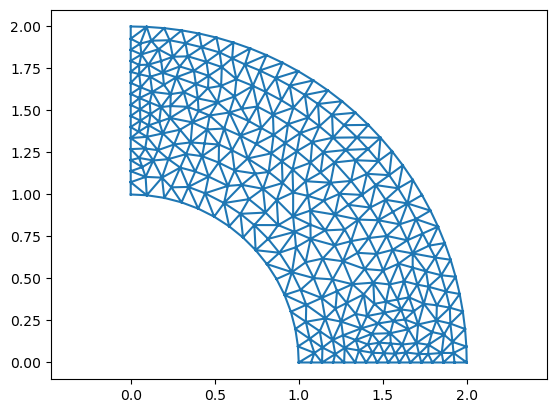

330
583


In [4]:
import meshio
import matplotlib.pyplot as plt
import time

# mesh = meshio.read('../mesh-files/crown.vtu')
mesh = meshio.read('../mesh-files/crown_hard.vtu')
# mesh = meshio.read('../mesh-files/crown_harder.vtu')
# mesh = meshio.read('../mesh-files/crown_hardest.vtu')

%matplotlib inline
fig = plt.figure()
ax  = fig.gca()
ax.axis('equal')

plt.triplot( mesh.points[:,0], mesh.points[:,1], triangles = mesh.cells[0].data )
plt.show()


Points = mesh.points[:,:2]  # for sake of brevity (had to set :2 bcause meshio is stupid or something idk)
CList  = mesh.cells[0].data # for sake of brevity
B   = ( Points[CList[:,1:]] - Points[CList[:,0]][:,None,:] ).transpose( ( 0,2,1 ) )
dtB = np.linalg.det( B )
#iBt = np.linalg.inv( B ).transpose( (0,2,1) )

print( Points.shape[0] )
print( CList.shape[0] )

Let's start by computing
$$
\mathbf{f}_i = \int_{\Omega} f \varphi_i + \int_{\Gamma_N} g_1 \varphi_i
$$
where $f$ is the usual cupoletta we use to define on this crown section. For simplicity, set
$$
g_1 = 0.
$$

_Obviously_ we are going to use quadrature for this (hehe).
More importantly, as usual, we switch from a vertex-to-vertex point of view to an element-to-element point of view or we get lost for good.

Therefore the plan is 

- to loop through all the elements in the mesh, and for each of them compute the $d_{\text{elem}}+1$ integrals corresponding to the $d_{\text{elem}}+1$ branches of the basis functions insisting on the element.

- accumulate the $N_c(d_{\text{elem}}+1)$ computed contributions to form the required integrals.



***Example:*** _Say the basis function $\varphi_i$ centered on the vertex $i$ insists on the elements $A$, $B$, $C$, $D$, and $E$, then
$$
\mathbf{f}_i = \int_{\Omega} f \varphi_i 
= 
\int_{A} f \varphi_i 
+
\int_{B} f \varphi_i 
+
\int_{C} f \varphi_i 
+
\int_{D} f \varphi_i 
+
\int_{E} f \varphi_i.
$$
But, as already mentioned, if we were to compute $f_i$ like this (that is, searching the elements each vertex $i$ participate to) it would be extremely long.
Therefore, for each element we compute the $d_{\text{elem}}+1$ contributions and sum them up afterwards._



In [5]:
def fun( x ):
    r = 1
    R = 2
    z =   np.sin( np.arccos( x[:,0] / np.sqrt( np.sum( x**2,1 ) ) ) ) \
        * np.cos( np.arccos( x[:,0] / np.sqrt( np.sum( x**2,1 ) ) ) ) \
        * ( np.sqrt( np.sum( x**2,1 ) ) - r ) * ( R - np.sqrt( np.sum( x**2,1 ) ) )
    
    return z[:,None]

In [6]:
Nv     = Points.shape[0]
Nc     =  CList.shape[0]
d_elem =  CList.shape[1] - 1

X, W = simplexQuadrature( 4, d_elem )
rhs = np.zeros( ( Nc, CList.shape[1] ) ) # we make space for the Nc * CList.shape[1] contributions!
for q in range( W.shape[0] ):
    N0 = phi( d_elem, X[q,:][None,:] )
    rhs = rhs + ( fun( B @ X[q,:] + Points[CList[:,0]] ) @ N0 ) * ( dtB * W[q] )[:,None]
# ^^^until here it is EXACTLY as it is if we were to compute \int \sum_{i=1}^Nv f*phi

# now the tricky part: we don't sum blindly as before but on an element basis
rhs = np.bincount( CList.reshape(-1,order='F'), rhs.reshape(-1,order='F'), Nv ) 

In [7]:
# Explanation:

# here we unroll (some of) the CList showing the indexes of the vertices forming the elements
print( CList.reshape(-1,order='F')[:10] ) 
# here we unroll (some of) the contributions for each    of the vertices forming the elements
print(   rhs.reshape(-1,order='F')[:10] )
print(' ')
# bincount accumulates the contributions relative to the same indexes
# example

indexes = np.array([0,1,1,0,3,4])
contrib = np.array([1,1,6,1,1,8])
result = np.bincount( indexes, contrib, 5 ) 
print( result )

[201 214 202 245 216 231 202 229 245 230]
[2.04045960e-07 5.52519214e-06 1.99219842e-06 2.94092402e-05
 9.99271168e-06 8.88379381e-06 2.51408659e-06 2.83864541e-06
 3.03563951e-06 5.73616942e-05]
 
[2. 7. 0. 1. 8.]


Now we assemble the mass instead, that is the matrix
$$
\mathbf{M}_{ij} = \int_{\Omega} \varphi_j \varphi_i.
$$

Once again the magic lies in switching perspective from vertices to elements: whatever happens, on each element we will have $d_{\text{elem}}+1$ basis functions to be integrated on that element pairwise for a grand total of $N_c(d_{\text{elem}}+1)^2$ contributions (i.e. $(d_{\text{elem}}+1)^2$ for each element).

***Example:*** _Suppose we have a triangular mesh and we want to assemble $\mathbf{M}$. Suppose the element (triangle) $K$ is formed by the vertices $i, j, k$. (2,3,5)_

_Associated to $K$ there will be the small 3-by-3 matrix
$$
M_K
=
\begin{pmatrix}
\int_{K} \varphi_i \varphi_i & \int_{K} \varphi_i \varphi_j & \int_{K} \varphi_i \varphi_k \\
\int_{K} \varphi_j \varphi_i & \int_{K} \varphi_j \varphi_j & \int_{K} \varphi_j \varphi_k \\
\int_{K} \varphi_k \varphi_i & \int_{K} \varphi_k \varphi_j & \int_{K} \varphi_k \varphi_k \\
\end{pmatrix}
$$
collecting the ***only non-zero*** contributions carried by the element $K$._

_Once all these matrices are formed one has to sum up contributions in an orderly manner, that is we have to sum up contributions into the entries corresponding to the basis functions appearing in the integral._

***Example:*** Let's assemble a little mass matrix:

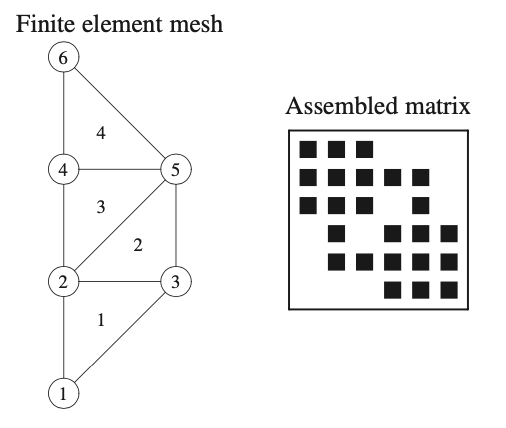

In [8]:
from IPython.display import Image
Image("img/global_mat.png")

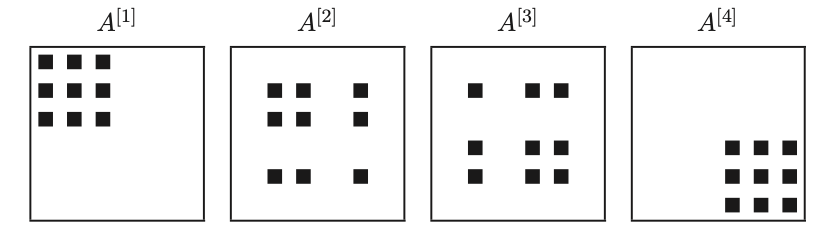

In [9]:
Image("img/local_mat.png")

In [10]:
Nv     = Points.shape[0]
Nc     =  CList.shape[0]
d_elem =  CList.shape[1] - 1

i = np.kron( np.ones( ( 1,CList.shape[1] ), dtype = 'int64' ), CList )
j = np.kron( CList, np.ones( ( 1,CList.shape[1] ), dtype = 'int64' ) )

X, W = simplexQuadrature( 2, d_elem )
mass = np.zeros( ( Nc, CList.shape[1], CList.shape[1] ) ) # we make space for the Nc * CList.shape[1]**2 contributions!
for q in range( W.shape[0] ):
    N0 = phi( d_elem, X[q,:][None,:] )
    mass = mass + ( N0.T @ N0 ) * ( dtB * W[q] )[:,None,None]
# ^^^until here it is ALMOST as it is if we were to compute \int \sum_{i=1}^Nv f*phi
# the only difference is that ( N0.T @ N0 ) is a CList.shape[1] x CList.shape[1] matrix

# now the tricky part: we have to sum up in orderly manner as explained in the figure above
# lucky for us, the assembly of csr works exactly as bincount
# as seen in the sparse data structure lecture we could have assembled a coo matrix and then
# explicitly ask for summation of "repeated" entries
M = sps.csr_matrix( ( mass.reshape(-1,order='F'), ( i.reshape(-1,order='F'), j.reshape(-1,order='F') ) ), shape = ( Nv, Nv ), dtype = np.float64 )


[[1 2 3]
 [2 3 5]
 [2 5 4]
 [4 5 6]]

[[1 2 3 1 2 3 1 2 3]
 [2 3 5 2 3 5 2 3 5]
 [2 5 4 2 5 4 2 5 4]
 [4 5 6 4 5 6 4 5 6]]

[[1 1 1 2 2 2 3 3 3]
 [2 2 2 3 3 3 5 5 5]
 [2 2 2 5 5 5 4 4 4]
 [4 4 4 5 5 5 6 6 6]]


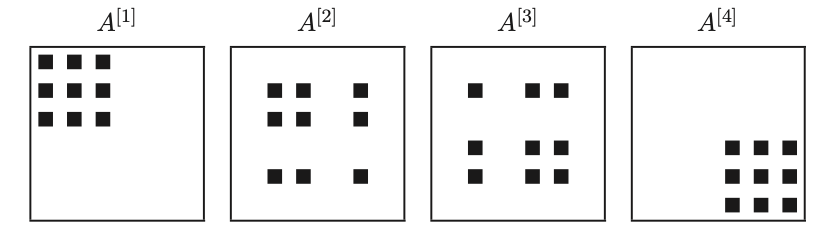

In [11]:
# why are i and j defined like this?
# let's see an easy example from the little mesh above (we don't need Points or anything else)
toy_CList = np.array([[1,2,3],[2,3,5],[2,5,4],[4,5,6]])

i = np.kron( np.ones( ( 1,toy_CList.shape[1] ), dtype = 'int64' ), toy_CList )
j = np.kron( toy_CList, np.ones( ( 1,toy_CList.shape[1] ), dtype = 'int64' ) )

print( toy_CList )
print('')
print( i )
print('')
print( j )
Image("img/local_mat.png")

In [12]:
# here the function doing exactly this! Save it for later!

def mass_assembly( Points, CList, dtB ):
    
    Nv     = Points.shape[0]
    Nc     =  CList.shape[0]
    d_elem =  CList.shape[1] - 1

    i = np.kron( np.ones( ( 1,CList.shape[1] ), dtype = 'int64' ), CList ).reshape(-1,order='F')
    j = np.kron( CList, np.ones( ( 1,CList.shape[1] ), dtype = 'int64' ) ).reshape(-1,order='F')

    X, W = simplexQuadrature( 2, d_elem )
    mass = np.zeros( ( Nc, CList.shape[1], CList.shape[1] ) )
    for q in range( W.shape[0] ):
        N0 = phi( d_elem, X[q,:][None,:] )
        mass = mass + ( N0.T @ N0 ) * ( dtB * W[q] )[:,None,None]
    M = sps.csr_matrix( ( mass.reshape(-1,order='F'), ( i, j ) ), shape = ( Nv, Nv ), dtype = np.float64 )

    return M

In [13]:
def stiff_assembly( Points, CList, dtB, iBt, sigma = None ):
    
    Nv     = Points.shape[0]
    Nc     =  CList.shape[0]
    d_elem =  CList.shape[1] - 1

    i = np.kron( np.ones( ( 1,CList.shape[1] ), dtype = 'int64' ), CList ).reshape(-1,order='F')
    j = np.kron( CList, np.ones( ( 1,CList.shape[1] ), dtype = 'int64' ) ).reshape(-1,order='F')
    
    if np.logical_not( bool( sigma ) ):
        sigma = np.stack( Nc * tuple( np.eye(d_elem)[None,:,:] ), axis = 0 )
        
    X, W = simplexQuadrature( 1, d_elem )
    stiff = np.zeros( ( Nc, CList.shape[1], CList.shape[1] ) )
    for q in range( W.shape[0] ):
        N1 = iBt @ gradphi( d_elem, X[q,:][None,:] )
        stiff = stiff - ( N1.transpose(0,2,1) @ (sigma @ N1) ) * ( dtB * W[q] )[:,None,None]
    S = sps.csr_matrix( ( stiff.reshape(-1,order='F'), ( i, j ) ), shape = ( Nv, Nv ), dtype = np.float64 )
    
    return S

### Compute L2 and H1 norms with mass and stiffness

Say we want to compute the $L_2$-norm of a function $v_h \in V_h$.
Thanks to the following, it is easier than expected:
$$
\begin{align}
\lvert|
v_h
\rvert|_2^2
=
\biggl\lvert\biggl\lvert
\sum_{i=1}^{N_v} c_i \varphi_i
\biggr\rvert\biggr\rvert_2^2
&=
\int_{\Omega} (\sum_{i=1}^{N_v} c_i \varphi_i)^2 \\
&=
\int_{\Omega}  \sum_{i=1}^{N_v}\sum_{j=1}^{N_v} c_ic_j \varphi_i\varphi_j \\
&=
\sum_{i=1}^{N_v}\sum_{j=1}^{N_v} c_ic_j \int_{\Omega}  \varphi_i\varphi_j \\
&=
\mathbf{c}^{\top}
\mathbf{M}
\mathbf{c},
\end{align}
$$
nice, right?
The point is, if you _already_ have $\mathbf{M}$, then it may be worth computing $\lvert|v_h\rvert|_2$ this way. 
If instead you have to assemble $\mathbf{M}$ _just_ for doing that you're better off with the usual loop!

Btw, let's see that in action:

In [14]:
X, W = simplexQuadrature( N = 4, D = 2 )
chi = lambda x: np.ones( x.shape[0] ) # embarassingly easy but there's a reason!!

# L_2 norm of chi(x)
res = 0
for q in range(W.size):
    p = B @ X[q,:] + Points[CList[:,0]]
    z = chi( p )[:,None]
    res = res + z**2 * W[q] * dtB[:,None]
res = np.sqrt( np.sum( res ) )
print('L_2 norm of chi(x) computed the standard way:', res ) 

# L_2 norm of   v(x)
c = chi( Points ).reshape(-1) # pcwise linear coefficients
res = 0
for q in range(W.size):
    p = B @ X[q,:] + Points[CList[:,0]]
    z = c[CList] @ phi( 2, X[q,:][None,:] ).T
    res = res + z**2 * W[q] * dtB[:,None]
res = np.sqrt( np.sum( res ) )
print('L_2 norm of   v(x) computed the standard way:', res ) # ofc they coincide: chi is perfectly approxd by s

L_2 norm of chi(x) computed the standard way: 1.534990607983723
L_2 norm of   v(x) computed the standard way: 1.534990607983723


In [15]:
# L_2 norm of   v(x)
M = mass_assembly( Points, CList, dtB )
print( 'L_2 norm of   v(x) computed with mass matrix:', np.sqrt( c.T @ M @ c ) )

L_2 norm of   v(x) computed with mass matrix: 1.5349906073201134


Now something a bit more exciting, let's compute the $L_2$-norm of the usual $f$ we define on the crown section and the one of its piecewise linear approximation, say, $s_h$.

It'll be more challenging given the jacobian of the change of variables (from polar to cartesian) will appear.

In [16]:
# L_2 norm of f(x)
res = 0
for q in range(W.size):
    p = B @ X[q,:] + Points[CList[:,0]]
    z = fun( p )
    jac = 1 / np.sqrt( np.sum( p**2,1 ) )
    res = res + z**2 * jac[:,None] * W[q] * dtB[:,None]
res = np.sqrt( np.sum( res ) )
print('L_2 norm of f(x) computed the standard way:', res ) # you'll see it won't coincide with L2norm of pcwise linear. Why that?

# L_2 norm of s(x)
d = fun( Points ).reshape(-1)
res = 0
for q in range(W.size):
    p = B @ X[q,:] + Points[CList[:,0]]
    z = d[CList] @ phi( 2, X[q,:][None,:] ).T
    jac = 1 / np.sqrt( np.sum( p**2,1 ) )
    res = res + z**2 * jac[:,None] * W[q] * dtB[:,None]
res = np.sqrt( np.sum( res ) )
print('L_2 norm of s(x) computed the standard way:', res )

# L_2 norm of s(x)
jac = np.sqrt( np.sum( Points**2,1 ) )
print( 'L_2 norm of s(x) computed with mass matrix:', np.sqrt( d.T @ M @ ( d / jac ) ) ) # jac HAD to go somewhere, right?


L_2 norm of f(x) computed the standard way: 0.08090108015556927
L_2 norm of s(x) computed the standard way: 0.08014412247633694
L_2 norm of s(x) computed with mass matrix: 0.08014186772208953


Cool, cool, cool. How about $H_1$ norm of a function $v_h \in V_h$?
Let's see:
$$
\begin{align}
\lvert|
\nabla v_h
\rvert|_2^2
=
\biggl\lvert\biggl\lvert
\sum_{i=1}^{N_v} c_i \nabla\varphi_i
\biggr\rvert\biggr\rvert_2^2
&=
\int_{\Omega} (\sum_{i=1}^{N_v} c_i \nabla\varphi_i)^2 \\
&=
\int_{\Omega}  \sum_{i=1}^{N_v}\sum_{j=1}^{N_v} c_ic_j \nabla\varphi_i\nabla\varphi_j \\
&=
\sum_{i=1}^{N_v}\sum_{j=1}^{N_v} c_ic_j \int_{\Omega}  \nabla\varphi_i\nabla\varphi_j
\end{align}
$$
which _seems_ to be $-\mathbf{S}$ but it is not. It is only if the conductivity tensor $\sigma$ is the identity tensor over the whole domain $\Omega$.



Let's see that in action:

In [18]:
iB = np.linalg.inv( B )
S = stiff_assembly( Points, CList, dtB, iB.transpose(0,2,1) ) # sigma not provided -> S fits our purposes

# L_2 norm of grad( fun )
# DISCLAIMER: not gona compute dfun for computing ||grad(fun)||_2! You can, though :3


# L_2 norm of s'(x)
d = fun( Points ).reshape(-1)
res = 0
for q in range(W.size):
    p = B @ X[q,:] + Points[CList[:,0]]
    z = ( ( d[CList] @ gradphi( 2, X[q,:] ).T )[:,None,:] @ iB ).reshape(-1,2)
    jac = 1 / np.sqrt( np.sum( p**2,1 ) )
    res = res + z**2 * jac[:,None] * W[q] * dtB[:,None]
res = np.sqrt( np.sum( res ) )
print('L_2 norm of s\'(x) computed the standard way:', res )

# L_2 norm of s'(x)
jac = np.sqrt( np.sum( Points**2,1 ) )
print( 'L_2 norm of s\'(x) computed with stiffness matrix:', np.sqrt( d.T @ (- S) @ ( d / jac ) ) ) # jac HAD to go somewhere, right?

L_2 norm of s'(x) computed the standard way: 0.2772905983121591
L_2 norm of s'(x) computed with stiffness matrix: 0.27462945401389127
